In [1]:
import pandas as pd
import numpy as np
import pickle

from tqdm import tqdm

from models import Model1, Model2, Model3
from tools import Train, validation, GridSearch

In [2]:
import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')

from sklearn.metrics import r2_score, mean_absolute_error

In [3]:
with open('data/train_dataset.pickle', 'rb') as f:
    train_dataset = pickle.load(f)

with open('data/val_dataset.pickle', 'rb') as f:
    val_dataset = pickle.load(f)

with open('data/test_dataset.pickle', 'rb') as f:
    test_dataset = pickle.load(f)

In [4]:
train_loader = DataLoader(train_dataset, batch_size = 16, shuffle = True)
val_loader = DataLoader(val_dataset, batch_size = 64, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [5]:
criterion = nn.MSELoss()
eval_metrics = [
    r2_score,
    mean_absolute_error
]

# Model 2

In [6]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'skip_hidden_size': [32, 40],
    'T_modified': [20, 30],
    'skip': [8, 10]
}

model_name = 'model2'
grid_model2 = GridSearch(criterion, eval_metrics, device, temp_save_path=f'checkpoints/model_by_param/temp_{model_name}.pt', masked=False)
best_model2 = grid_model2.train_by_grid(
        Model2, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total  16 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [02:37<00:00, 16.50it/s, Train Loss=0.6159, Valid Loss=0.2213, Valid R2=0.5007, Valid MAE=0.3869]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch 15: 100%|██████████| 2607/2607 [02:38<00:00, 16.41it/s, Train Loss=0.5676, Valid Loss=0.2403, Valid R2=0.4578, Valid MAE=0.3780]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [02:38<00:00, 16.44it/s, Train Loss=0.5843, Valid Loss=0.1578, Valid R2=0.6439, Valid MAE=0.3069]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:37<00:00, 16.52it/s, Train Loss=0.6102, Valid Loss=0.1966, Valid R2=0.5564, Valid MAE=0.3572]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:37<00:00, 16.61it/s, Train Loss=0.5871, Valid Loss=0.2473, Valid R2=0.4420, Valid MAE=0.3848]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch 19: 100%|██████████| 2607/2607 [02:37<00:00, 16.58it/s, Train Loss=0.5758, Valid Loss=0.2531, Valid R2=0.4288, Valid MAE=0.4066]


Early Stopped
Setting   6 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [02:35<00:00, 16.73it/s, Train Loss=0.6172, Valid Loss=0.2197, Valid R2=0.5044, Valid MAE=0.3802]


Early Stopped
Setting   7 of Parameters Grid is now on progres.


Epoch 10: 100%|██████████| 2607/2607 [02:34<00:00, 16.88it/s, Train Loss=0.5722, Valid Loss=0.2952, Valid R2=0.3338, Valid MAE=0.3842]


Early Stopped
Setting   8 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [02:36<00:00, 16.64it/s, Train Loss=0.5796, Valid Loss=0.2485, Valid R2=0.4393, Valid MAE=0.4091]


Early Stopped
Setting   9 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [02:35<00:00, 16.78it/s, Train Loss=0.6054, Valid Loss=0.2071, Valid R2=0.5326, Valid MAE=0.3756]


Early Stopped
Setting  10 of Parameters Grid is now on progres.


Epoch 14: 100%|██████████| 2607/2607 [02:36<00:00, 16.70it/s, Train Loss=0.5681, Valid Loss=0.2258, Valid R2=0.4904, Valid MAE=0.3688]


Early Stopped
Setting  11 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [02:36<00:00, 16.71it/s, Train Loss=0.5495, Valid Loss=0.1908, Valid R2=0.5694, Valid MAE=0.3393]


Early Stopped
Setting  12 of Parameters Grid is now on progres.


Epoch 12: 100%|██████████| 2607/2607 [02:35<00:00, 16.78it/s, Train Loss=0.5062, Valid Loss=0.3636, Valid R2=0.1795, Valid MAE=0.4117]


Early Stopped
Setting  13 of Parameters Grid is now on progres.


Epoch  8: 100%|██████████| 2607/2607 [02:34<00:00, 16.84it/s, Train Loss=0.5902, Valid Loss=0.1607, Valid R2=0.6373, Valid MAE=0.3339]


Early Stopped
Setting  14 of Parameters Grid is now on progres.


Epoch 13: 100%|██████████| 2607/2607 [02:37<00:00, 16.57it/s, Train Loss=0.5878, Valid Loss=0.1832, Valid R2=0.5865, Valid MAE=0.3446]


Early Stopped
Setting  15 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [02:39<00:00, 16.38it/s, Train Loss=0.5922, Valid Loss=0.1828, Valid R2=0.5875, Valid MAE=0.3527]

Early Stopped


Test Loss: 0.1406 | Test R2: 0.9236 | Test MAE: 0.3050
Saving Process Complete. Directory: model2_losses.png


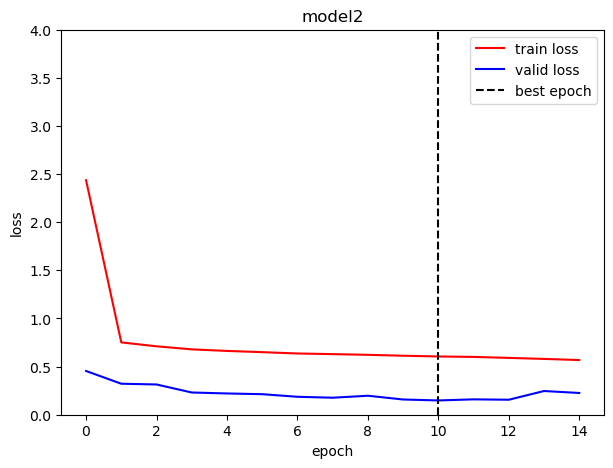

In [7]:
grid_model2.test(test_loader)
grid_model2.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')

# Model 3

In [8]:
basic_params = {
    'T': 60,
    'n': 40
}

param_grid = {
    'm': [32, 40],
    'skip_hidden_size': [32, 40],
    'T_modified': [20, 30],
    'skip': [8, 10]
}

model_name = 'model3'
grid_model3 = GridSearch(criterion, eval_metrics, device, temp_save_path=f'checkpoints/model_by_param/temp_{model_name}.pt', masked=False)
best_model3 = grid_model3.train_by_grid(
        Model3, basic_params, param_grid,
        torch.optim.Adam, train_loader, val_loader,
        patience=3, epochs=20,
        save_filename=f'checkpoints/{model_name}_best.pt'
    )

Total  16 cases are going to be searched.
Setting   0 of Parameters Grid is now on progres.


Epoch 17: 100%|██████████| 2607/2607 [01:16<00:00, 34.15it/s, Train Loss=0.7302, Valid Loss=0.1642, Valid R2=0.6296, Valid MAE=0.3215]


Early Stopped
Setting   1 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:15<00:00, 34.75it/s, Train Loss=0.7673, Valid Loss=0.1738, Valid R2=0.6079, Valid MAE=0.3481]


Early Stopped
Setting   2 of Parameters Grid is now on progres.


Epoch 17: 100%|██████████| 2607/2607 [01:40<00:00, 25.86it/s, Train Loss=0.7130, Valid Loss=0.1525, Valid R2=0.6560, Valid MAE=0.3154]


Early Stopped
Setting   3 of Parameters Grid is now on progres.


Epoch 16: 100%|██████████| 2607/2607 [01:38<00:00, 26.40it/s, Train Loss=0.7078, Valid Loss=0.2268, Valid R2=0.4882, Valid MAE=0.3797]


Early Stopped
Setting   4 of Parameters Grid is now on progres.


Epoch  9: 100%|██████████| 2607/2607 [01:21<00:00, 32.07it/s, Train Loss=0.7801, Valid Loss=0.3063, Valid R2=0.3088, Valid MAE=0.4812]


Early Stopped
Setting   5 of Parameters Grid is now on progres.


Epoch  4:   7%|▋         | 192/2607 [00:06<01:17, 31.35it/s, Train Loss=0.78958] 

In [ ]:
grid_model3.test(test_loader)
grid_model3.plot_losses(plot_title=f'{model_name}', save_filename=f'{model_name}_losses.png')